In [1]:
import numpy as np
import pandas as pd
import os
import pyarrow
import fastparquet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
parquet_file = "fe_cleaned_overall.parquet"
data = pd.read_parquet(parquet_file, engine='pyarrow')
seed_num = 2024

# Define the directory to save the files
save_dir = "../Data/"
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

data = data.sample(n=50000, random_state=seed_num)
data

,DAYSTOINCEPTION,MARITALSTATUS,NOOFCHILDREN,HOMEOWNERIND,VEHICLE_LEFTORRIGHTHANDDRIVE,DRIVER1_AGE,DRIVER1_LICENCETYPE,DRIVER2_LICENCETYPE,DRIVER3_LICENCETYPE,DRIVER4_LICENCETYPE,...,MIN_NRCONVICTIONS_LONGER,MAX_NRCONVICTIONS_LONGER,AVERAGE_NRCONVICTIONS_LONGER,MIN_CLAIMSCOUNT_LONGER,MAX_CLAIMSCOUNT_LONGER,AVERAGE_CLAIMSCOUNT_LONGER,TIME_SINCE_MANUF,TIME_SINCE_FIRST_REGD,TIME_SINCE_PURCHASE,TOP5PREMIUM
163946,0.0,5,0,0,1,20.0,1,1,1,5,...,0.0,0.0,0.000000,0.0,1.0,0.333333,10.496920,10.496920,0.646133,1609.25
165808,22.0,1,0,1,1,49.0,1,1,5,5,...,0.0,0.0,0.000000,0.0,0.0,0.000000,18.496920,18.496920,0.646133,409.60
76987,0.0,5,1,0,1,36.0,1,1,5,5,...,0.0,0.0,0.000000,0.0,0.0,0.000000,11.496235,11.496235,4.750171,455.06
129590,20.0,4,0,1,1,64.0,1,5,5,5,...,0.0,0.0,0.000000,0.0,0.0,0.000000,11.496235,11.496235,4.498289,456.25
240756,16.0,5,0,0,1,28.0,1,1,1,5,...,0.0,1.0,0.333333,0.0,0.0,0.000000,16.498289,16.498289,3.663244,878.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41771,29.0,5,0,0,1,21.0,1,5,5,5,...,0.0,0.0,0.000000,0.0,0.0,0.000000,7.496235,7.496235,1.916496,1208.09
240986,18.0,4,1,1,1,41.0,1,1,5,5,...,0.0,0.0,0.000000,0.0,0.0,0.000000,10.496920,10.496920,10.001369,385.02
60610,29.0,5,0,0,1,21.0,1,5,5,5,...,0.0,0.0,0.000000,0.0,0.0,0.000000,9.497604,9.497604,2.168378,2105.51
222789,2.0,3,0,0,1,53.0,1,5,5,5,...,0.0,0.0,0.000000,0.0,0.0,0.000000,16.498289,16.498289,0.646133,374.00


In [3]:
# Separate features and target variable
X = data.drop('TOP5PREMIUM', axis=1)
y = data['TOP5PREMIUM']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)

# List of numerical columns to be standardized
numerical_columns = [
    "DAYSTOINCEPTION", "DRIVER1_AGE", "DRIVER1_NOOFYEARSUKRESIDENCY", 
    "NOOFVEHICLESAVAILABLETOFAMILY", "YEARS_NOCLAIMSDISCOUNT", "VEHICLE_VALUE", 
    "VEHICLE_ANNUALMILEAGE", "VEHICLE_AGE", "VEHICLE_NOOFSEATS", 
    "DRIVER1_CREDITSCORE", "VEHICLE_CUBICCAPACITY", "DRIVER1_NRCONVICTIONS_LONGER", 
    "DRIVER1_CLAIMSCOUNT_LONGER", "UNDISCLOSED_CLAIMS", "NUMBER_OF_DRIVERS", 
    "MIN_DRIVER_AGE", "MAX_DRIVER_AGE", "AVERAGE_DRIVER_AGE", 
    "MIN_YEARS_UK_RESIDENCY", "MAX_YEARS_UK_RESIDENCY", "AVERAGE_YEARS_UK_RESIDENCY", 
    "MIN_CREDIT_SCORE", "MAX_CREDIT_SCORE", "AVERAGE_CREDIT_SCORE", 
    "MIN_NRCONVICTIONS_LONGER", "MAX_NRCONVICTIONS_LONGER", "AVERAGE_NRCONVICTIONS_LONGER", 
    "MIN_CLAIMSCOUNT_LONGER", "MAX_CLAIMSCOUNT_LONGER", "AVERAGE_CLAIMSCOUNT_LONGER", 
    "TIME_SINCE_MANUF", "TIME_SINCE_FIRST_REGD", "TIME_SINCE_PURCHASE", "POSTCODESECTOR", 
    "VEHICLE_MODEL"
]

X_train_original_scale = X_train
X_test_original_scale = X_test
X_train_original_scale.to_parquet(os.path.join(save_dir, f'X_train_original_scale_{seed_num}_50000.parquet'), index=False)
X_test_original_scale.to_parquet(os.path.join(save_dir, f'X_test_original_scale_{seed_num}_50000.parquet'), index=False)

In [4]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the test set using the same scaler (do not fit again)
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Save the datasets as Parquet files
data.to_parquet("../Data/fe_cleaned_50000.parquet", index=False)
X_train.to_parquet(os.path.join(save_dir, f'X_train_{seed_num}_50000.parquet'), index=False)
X_test.to_parquet(os.path.join(save_dir, f'X_test_{seed_num}_50000.parquet'), index=False)
y_train.to_frame(name='target').to_parquet(os.path.join(save_dir, f'y_train_{seed_num}_50000.parquet'), index=False)
y_test.to_frame(name='target').to_parquet(os.path.join(save_dir, f'y_test_{seed_num}_50000.parquet'), index=False)

In [5]:
# Function to calculate percentage within tolerance
def calculate_within_tolerance(y_true, y_pred, tolerance):
    within_tolerance = abs(y_true - y_pred) / y_true <= tolerance
    percentage_within_tolerance = within_tolerance.mean() * 100
    return percentage_within_tolerance

In [6]:
# Train the XGBoost model
model = XGBRegressor(random_state=2024)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Apply the function to the evaluation part
within_10_percent = calculate_within_tolerance(y_test, y_pred, 0.10)
within_50_percent = calculate_within_tolerance(y_test, y_pred, 0.50)
within_100_percent = calculate_within_tolerance(y_test, y_pred, 1.00)

print(f'Percentage within 10%: {within_10_percent:.2f}%')
print(f'Percentage within 50%: {within_50_percent:.2f}%')
print(f'Percentage within 100%: {within_100_percent:.2f}%')

Mean Squared Error: 98826.6534220301
Percentage within 10%: 30.18%
Percentage within 50%: 89.72%
Percentage within 100%: 98.40%


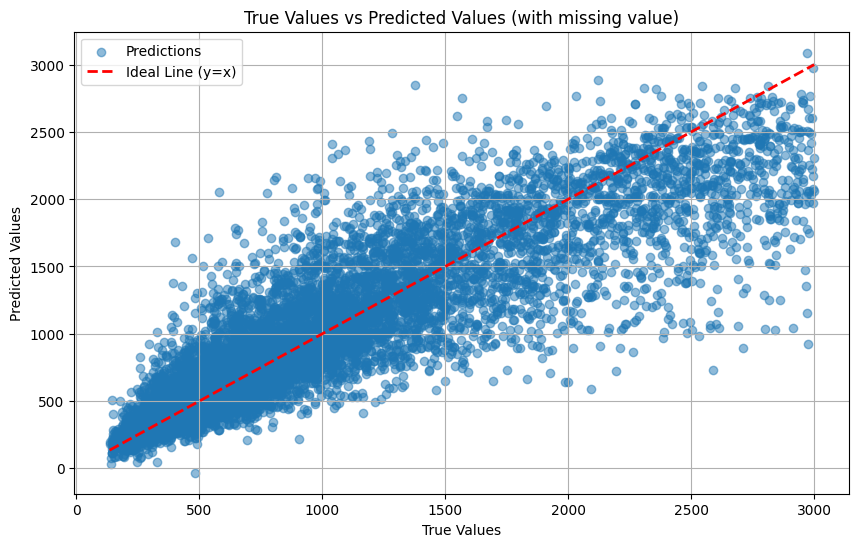

In [7]:
# Scatter plot of true values vs predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Line (y=x)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values (with missing value)')
plt.legend()
plt.grid(True)
plt.show()


Ranked Feature Importance:
                           Feature  Importance
18          YEARS_NOCLAIMSDISCOUNT    0.228801
41          MIN_YEARS_UK_RESIDENCY    0.102498
28        VEHICLE_TRANSMISSIONTYPE    0.063103
6              DRIVER1_LICENCETYPE    0.047735
3                     HOMEOWNERIND    0.045662
38                  MIN_DRIVER_AGE    0.036157
57             TIME_SINCE_PURCHASE    0.032112
31                   VEHICLE_MODEL    0.030457
15                  POSTCODESECTOR    0.028091
11    DRIVER1_OTHERVEHICLEOWNEDIND    0.022218
30             DRIVER1_CREDITSCORE    0.022095
51    AVERAGE_NRCONVICTIONS_LONGER    0.018022
46            AVERAGE_CREDIT_SCORE    0.016331
5                      DRIVER1_AGE    0.015444
54      AVERAGE_CLAIMSCOUNT_LONGER    0.014403
45                MAX_CREDIT_SCORE    0.013984
33           VEHICLE_CUBICCAPACITY    0.013370
47  INDICATOR_NRCONVICTIONS_RECENT    0.012768
7              DRIVER2_LICENCETYPE    0.011321
29               VEHICLE_NOOFSEA

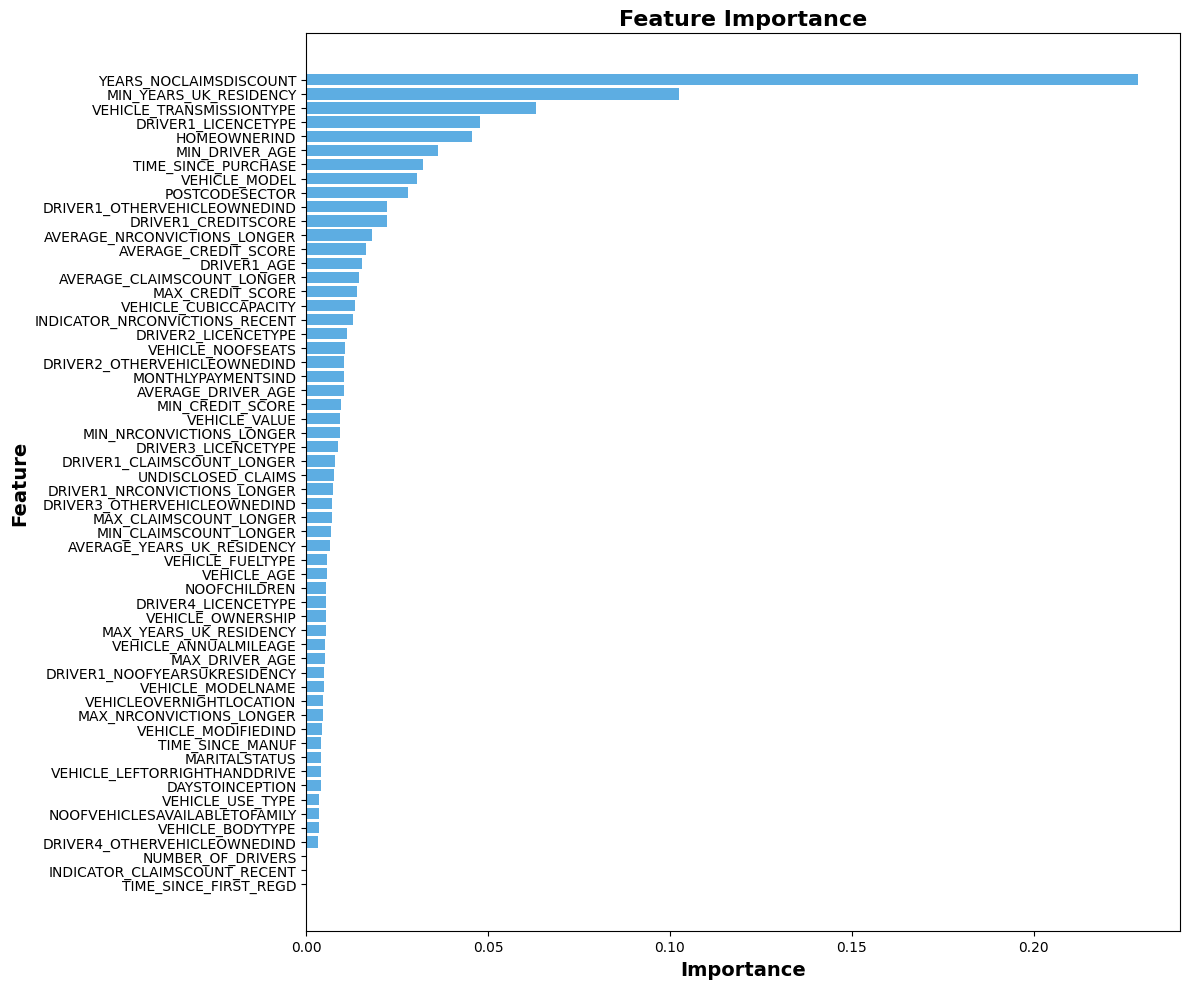

In [8]:
# Rank feature importance
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the ranked feature importance
print("\nRanked Feature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#5DADE2')  # Light blue color
plt.xlabel('Importance', fontsize=14, weight='bold')
plt.ylabel('Feature', fontsize=14, weight='bold')
plt.title('Feature Importance', fontsize=16, weight='bold')
plt.gca().invert_yaxis()

# # Annotate each bar with its importance value
# for index, value in enumerate(importance_df['Importance']):
#     plt.text(value, index, f'{value:.2f}', va='center', ha='right', fontsize=5, color='black', weight='bold')

plt.tight_layout()
plt.show()
